# Исследование популярности компьютерных игр

Интернет-магазину, который продаёт по всему миру компьютерные игры, из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию.

**Необходимо составить портрет пользователя каждого региона:**

Определите для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5).
- Самые популярные жанры (топ-5).
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

**Проверить гипотезы:**
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

## Описание данных

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Шаг 1. Изучение общей информации <a id='section1'></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import math
import plotly.figure_factory as ff
import seaborn as sns

In [2]:
games = pd.read_csv('/datasets/games.csv')

In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Вывод

Изучив общую информацию, пропуски были обнаружены в столбцах `Name`, `Year_of_Release`, `Genre`, `Critic_Score`, `User_Score`, `Rating`. Для проведения анализа и проверки гипотез необходимо либо заполнить пропуски, либо удалить строки с ними, либо сделать срезы, невключающие неполные данные. По каждому столбцу далее будет дано объяснение, почему для него был выбран один из этих выриантов работы с пропусками. Некоторые столбцы имеют неоптимальные типы данных, а именно столбцы `Year_of_Release`, `NA_sales`, `EU_sales`, `JP_sales`, `Other_sales`, `Critic_Score`, `User_Score`. Но прежде всего необходимо понизить регистр названий столбцов.

## Шаг 2. Предобработка данных <a id='section2'></a>

### Изменение регистра названий столбцов

In [5]:
games.columns = games.columns.str.lower()
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Обработка пропусков

Обработаем пропуски в столбце `name`.

In [6]:
games.loc[games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Как можно заметить оба пропуска приходятся на игры с платформы Gen, а так же то, что у этих двух игр нет названий, а значит все пропуски столбца `genre` тоже находятся в этих строках. Найдем сколько копий всех игр было продано в каждом регионе на данной платформе.

In [7]:
(games
 .query('platform == "GEN"')
 .pivot_table(index='platform', values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], aggfunc='sum')
)

,eu_sales,jp_sales,na_sales,other_sales
platform,,,,
GEN,6.05,2.7,21.05,0.97


Так как названия игр для анализа нам не понадобятся, а жанр угадать не представляется возможным, и удалив эти строки мы лишим платформу Gen значимого количества продаж, то оставим эти столбцы без изменений.

Пропуски в столбце `year_of_release` заполним медианой по каждой платформе. Такой метод заполнения пропусков не должен повлиять на распределение даных. Пропуски могли появиться из-за отсутствия информации у человека, вносившего данные, в момент внесения, либо информацию не удалось найти в открытом доступе.

In [8]:
year_median = games.groupby('platform')['year_of_release'].median()
year_median.head()

platform
2600    1982.0
3DO     1995.0
3DS     2013.0
DC      2000.0
DS      2008.0
Name: year_of_release, dtype: float64

In [9]:
def fill_year(row):
    if row['year_of_release'] != row['year_of_release']:
        row['year_of_release'] = year_median[row['platform']]
    return row

games = games.apply(fill_year, axis=1)
print('Количество пропусков в стоблце year_of_release:', len(games.query('year_of_release == "NaN"')))

Количество пропусков в стоблце year_of_release: 0


Пропуски в столбцах с оценками и рейтингом `Critic_Score`, `User_Score`, `Rating` оставим не заполненными, так как на эти значения влияют множество факторов, а для некоторых платформ данные по этим столбцам вовсе отсутствуют.

Столбец `user_score` имеет строковый тип, хотя должен быть численным. Проверим какие значения содержатся внутри.

In [10]:
games.groupby('user_score')['name'].count().sort_values(ascending=False)

user_score
tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.9       2
2.3       2
9.6       2
9.7       1
0         1
Name: name, Length: 96, dtype: int64

Изучим срез по пользовательской оценке со значением `tbd`.

In [11]:
games.query('user_score == "tbd"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,2003.0,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


Так как это значение относится к играм разных платформ и жанров, то видимо это сокращение означение "to be determined" ("будет определено"), а значит можно заменить его на привычный "NaN".

In [12]:
def tbd_to_nan(value):
    if value == 'tbd':
        return np.NaN
    return value

games['user_score'] = games['user_score'].apply(tbd_to_nan)
print('Количество tbd в стоблце user_score:', len(games.query('user_score == "tbd"')))

Количество tbd в стоблце user_score: 0


Важно понимать, что пустые ячейки "NaN", которые были изначально говорят об отсутствии информации в момент ввода данных, а значения "tbd" подразумевали то, что информация возможно будет внесена позже, но по какой-то причине этого не сделали.

### Изменение типов данных

Первым делом избавимся от вещественного типа в столбце содержащем год выпуска.

In [13]:
games['year_of_release'] = games['year_of_release'].astype('int16')

Далее заменим тип float64 на менее тяжелый float16 для столбцов с количеством проданных копий.

In [14]:
for i in ['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score']:
    games[i] = games[i].astype('float16')

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 1:
    
Данные к нужному типу приведены :)
</div>

In [15]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16715 non-null int16
genre              16713 non-null object
na_sales           16715 non-null float16
eu_sales           16715 non-null float16
jp_sales           16715 non-null float16
other_sales        16715 non-null float16
critic_score       8137 non-null float16
user_score         7590 non-null float16
rating             9949 non-null object
dtypes: float16(6), int16(1), object(4)
memory usage: 751.0+ KB


Замена была произведена успешно.

In [16]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.375000,28.953125,3.769531,8.453125,76.0,8.000000,E
1,Super Mario Bros.,NES,1985,Platform,29.078125,3.580078,6.808594,0.770020,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.679688,12.757812,3.789062,3.289062,82.0,8.296875,E
3,Wii Sports Resort,Wii,2009,Sports,15.609375,10.929688,3.279297,2.949219,80.0,8.000000,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.273438,8.890625,10.218750,1.000000,NaN,NaN,NaN


### Подсчет суммарных продаж по всем регионам

In [17]:
def total_sales(row):
    return row['na_sales'] + row['eu_sales'] + row['jp_sales'] + row['other_sales']

games['total_sales'] = games.apply(total_sales, axis=1)
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.375000,28.953125,3.769531,8.453125,76.0,8.000000,E,82.550781
1,Super Mario Bros.,NES,1985,Platform,29.078125,3.580078,6.808594,0.770020,NaN,NaN,NaN,40.236816
2,Mario Kart Wii,Wii,2008,Racing,15.679688,12.757812,3.789062,3.289062,82.0,8.296875,E,35.515625
3,Wii Sports Resort,Wii,2009,Sports,15.609375,10.929688,3.279297,2.949219,80.0,8.000000,E,32.767578
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.273438,8.890625,10.218750,1.000000,NaN,NaN,NaN,31.382812


### Вывод

В данном разделе была произведена обработка пропусков, изменены типы данных в тех столбцах, где это было необходимо и подсчитаны суммарные продажи по всем регионам.

## Шаг 3. Исследовательский анализ данных <a id='section3'></a>

### Сколько игр выпускалось в разные годы?

Получим столбчатую диаграмму с количеством игр, выпущенных в разные года.

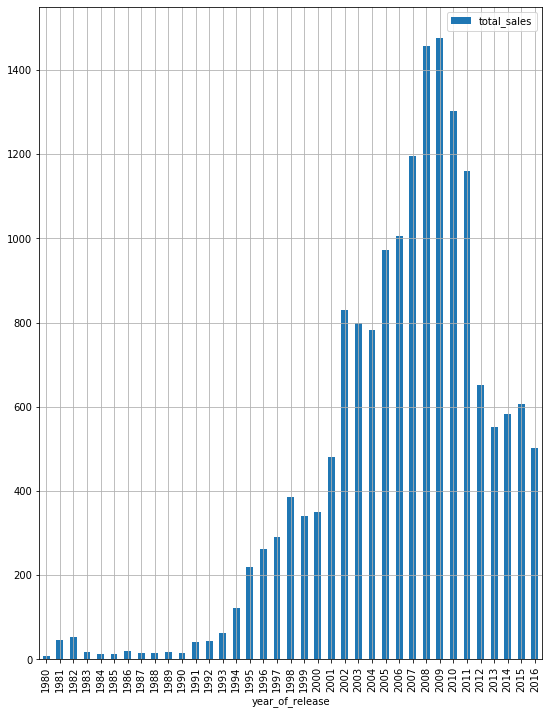

In [18]:
(games
 .pivot_table(index='year_of_release', values='total_sales', aggfunc='count')
 .plot(kind='bar', figsize=(9, 12), grid=True)
)

Видно, что с 1993-1994 начался резкий рост числа выпускаемых игр, а до этого периода выпускалось мало игр. Данные с неольшим количеством игр нам не нужны, поэтому издавимся от всех годов, в который выпущено меньше 100 игр.

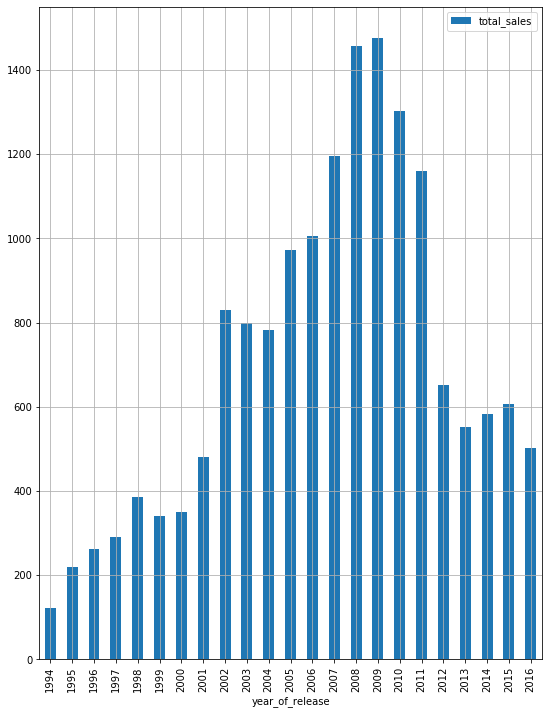

In [19]:
data = (games
        .pivot_table(index='year_of_release', values='total_sales', aggfunc='count')
        .query('total_sales > 100')
        .plot(kind='bar', figsize=(9, 12), grid=True)
)
data

Видно, что бурный рост числа игр остановился и перешел в снижение количества в 2009 году, а в 2012 он упал вовсе почти в 2 раза и далее снижение замедлилось. Возможно это связано с повышением требований к играм со стороны игроков и повышении стоимости производства.

### За какой характерный срок появляются новые и исчезают старые платформы?

Подсчитаем суммарное количество продаж по разным платформам.

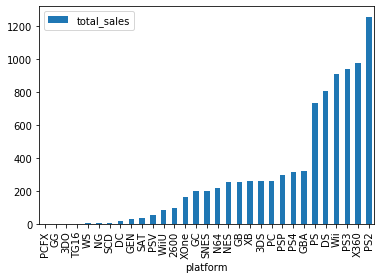

In [20]:
platforms = (games
             .pivot_table(index='platform', values='total_sales', aggfunc='sum')
             .sort_values('total_sales')
)
platforms.plot(kind='bar')

Заметим, что на платформах PS, DS, Wii, PS3, X360 и PS2 было продано явно больше игр, чем на оставшихся, поэтому построим распределение по годам для каждой из указаных платформ.

In [21]:
platforms = (platforms
             .query('total_sales > 600')
             .sort_values('total_sales', ascending=False)
            )
platforms

,total_sales
platform,
PS2,1255.776787
X360,971.414810
PS3,939.653969
Wii,907.517593
DS,806.127129
PS,730.863998


Диаграммы распрееления продаж по годам для каждой платформы
PS2 12 лет в обращении
X360 12 лет в обращении
PS3 11 лет в обращении
Wii 11 лет в обращении
DS 11 лет в обращении
PS 10 лет в обращении


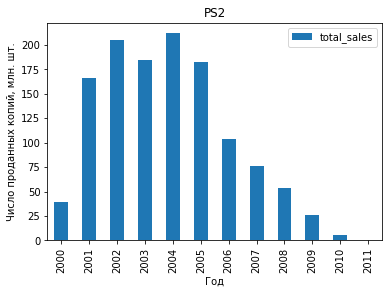

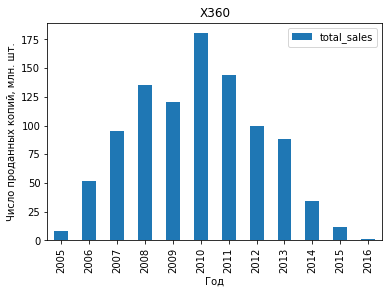

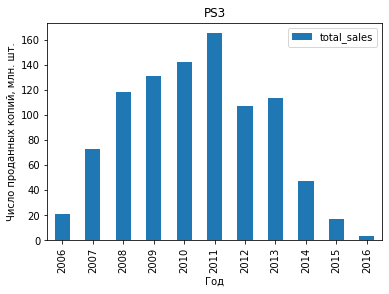

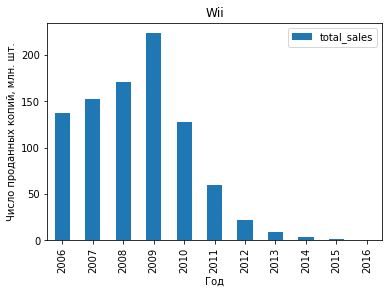

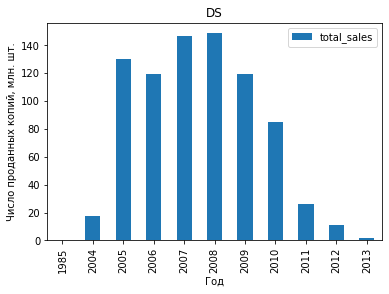

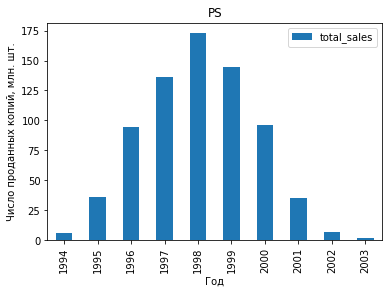

In [22]:
print('Диаграммы распрееления продаж по годам для каждой платформы')
for i in platforms.index:
    (games
     .query('platform == @i')
     .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
     .plot(kind='bar')
    )
    number = (games
     .query('platform == @i')
     .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
     .count()
    )
    plt.xlabel('Год')
    plt.ylabel('Число проданных копий, млн. шт.')
    plt.title(i)
    print(i, int(number),'лет в обращении')

Построенные диаграммы представляют из себя нормальные распределения, либо распределения Пуассона. Некорые имеют скос влево, что говорит, о высоком высоком количестве продаж на старте (PS2, Wii, DS). Исходя из полученных данных можно утверждать, что между появлением и исчезновением платформы проходит от 10 до 12 лет.

### Определение актуального периода

Исходя из диаграммы распеределния количества выпущенных игр по годам, актуальным периодом можно называть года с 2012 по 2016. На всякий случай подтвердим это диаграммой распределения количества проданных копий игр по годам.

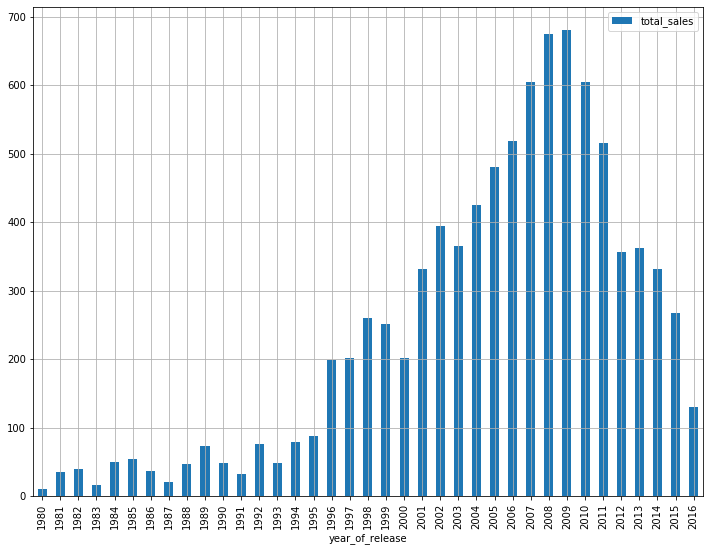

In [23]:
(games
        .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
        .plot(kind='bar', figsize=(12, 9), grid=True)
)

Характер диаграммы с 2012 показывает остановку падения спроса на игры. Так как данные за 2016 год не полные, то этим объясняется падение продаж.

Создадим срез по актуальному периоду 2012-2016.

In [24]:
data = games.query('year_of_release > 2011')

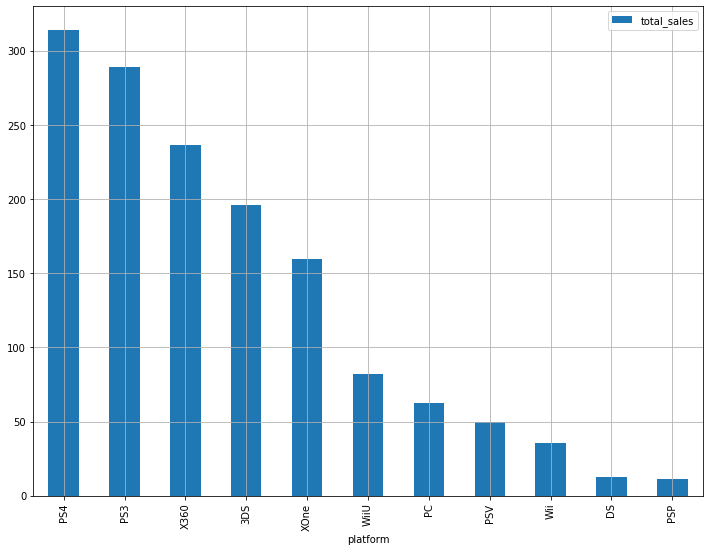

In [25]:
(data
 .pivot_table(index='platform', values='total_sales', aggfunc='sum')
 .sort_values('total_sales', ascending=False)
 .plot(kind='bar', figsize=(12, 9), grid=True)
)

Продажи на платформах PS4, PS3, X360, 3DS, XOne существенно выше чем на других платформах. Построим диаграммы изменения количества продаж по годам для этих платформ, чтобы определить потенциально прибыльные.

Диаграммы изменения количества продаж для каждой платформы


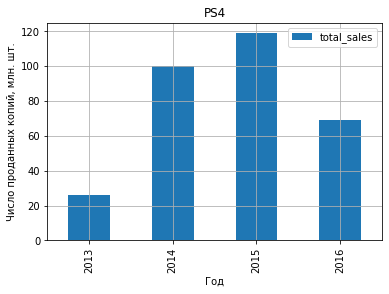

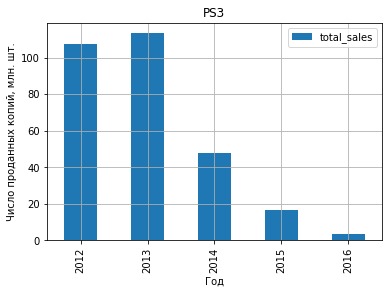

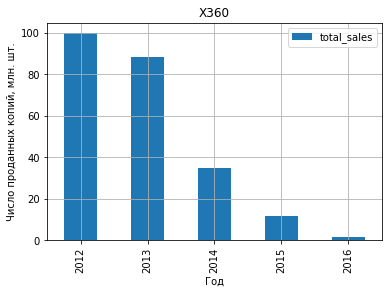

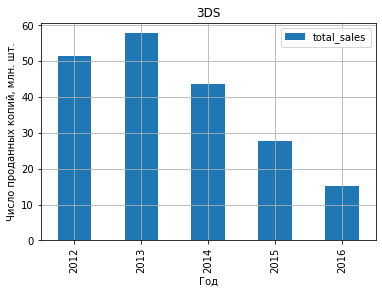

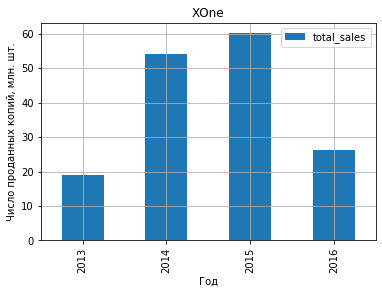

In [26]:
print('Диаграммы изменения количества продаж для каждой платформы')
for i in ['PS4', 'PS3', 'X360', '3DS', 'XOne']:
    (data
     .query('platform == @i')
     .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
     .plot(kind='bar', grid=True)
    )
    plt.xlabel('Год')
    plt.ylabel('Число проданных копий, млн. шт.')
    plt.title(i)

Из диаграмм, постоенных выше, следует, что даже на самых популярных платформах намечена нисходящая тенденция. Тем не менее, платформы XOne и в особенности PS4 в 2016 году все еще показывают приличное количество продаж.

Построим диаграмму "ящик с усами" для этих двух платформ.

Text(0.5, 1.0, 'PS4')

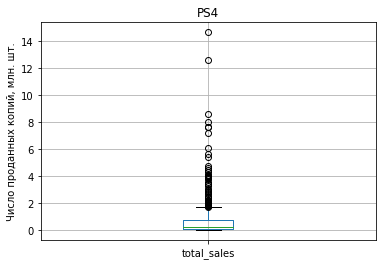

In [27]:
(data
       .query('platform == "PS4"')
       .boxplot(column=['total_sales'])
      )
plt.ylabel('Число проданных копий, млн. шт.')
plt.title('PS4')

Увеличим масштаб.

Text(0.5, 1.0, 'PS4')

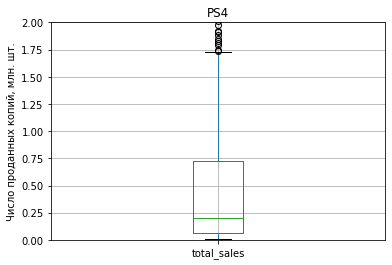

In [28]:
(data
       .query('platform == "PS4"')
       .boxplot('total_sales')
       .set_ylim([0, 2])
      )
plt.ylabel('Число проданных копий, млн. шт.')
plt.title('PS4')

Видно, что для PS4 большинство игр имеют суммарно не более 1.75 миллинов продаж. Вероятнее всего выпущенная на этой платформе игра продастся в количестве от 0.1 до 0.75 миллионов копий. Медиана равна примерно 0.2 миллионам.

Text(0.5, 1.0, 'XOne')

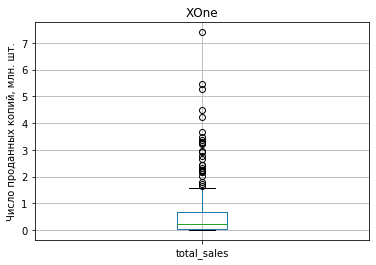

In [29]:
(data
       .query('platform == "XOne"')
       .boxplot(column=['total_sales'])
      )
plt.ylabel('Число проданных копий, млн. шт.')
plt.title('XOne')

Text(0.5, 1.0, 'XOne')

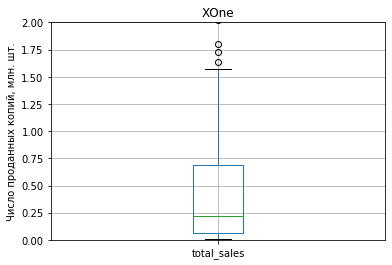

In [30]:
(data
       .query('platform == "XOne"')
       .boxplot(column=['total_sales'])
       .set_ylim([0, 2])
      )
plt.ylabel('Число проданных копий, млн. шт.')
plt.title('XOne')

Для XOne большинство игр имеют суммарно не более 1.6 миллинов продаж. Вероятнее всего выпущенная на этой платформе игра продастся в количестве от 0.1 до 0.7 миллионов копий. Медиана равна примерно 0.2 миллионам. Картина очень похожа на аналогичную для PS4, что может говорить о том, что такое распределение характерно для всех популярных платформ.

### Влияние отзывов на продажи внутри платформы PS4

In [31]:
ps4 = data.query('platform == "PS4"')

Проверим есть ли связь между продажами и отзывами критиков.

Корреляция отзывов критиков и продаж игры: 40.66%


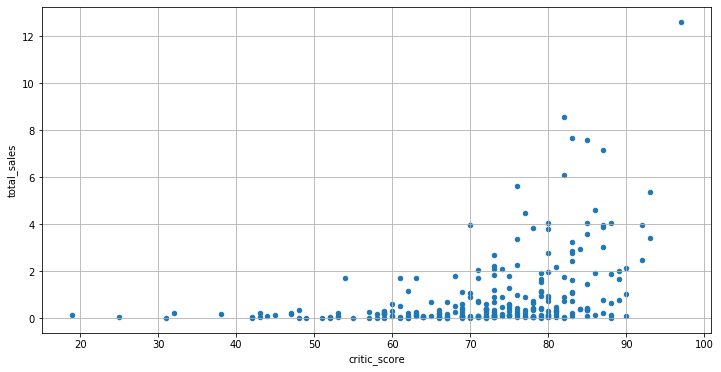

In [32]:
ps4.plot(x='critic_score', y='total_sales', kind='scatter', grid=True, figsize=(12, 6))
print('Корреляция отзывов критиков и продаж игры: {:.2%}'\
                                                  .format(ps4['total_sales'].corr(ps4['critic_score'])))

Судя по полученным данным, связь есть, но не слишком сильная (корреляция 40%), тем не менее по диаграмме рассеяния можно заметить, что чем выше рейтинг игры по мнению критиков, тем больше игр имеют хорошие продажи.

Проверим есть ли связь между продажами и отзывами пользователей.

Корреляция отзывов пользователей и продаж игры: -3.20%


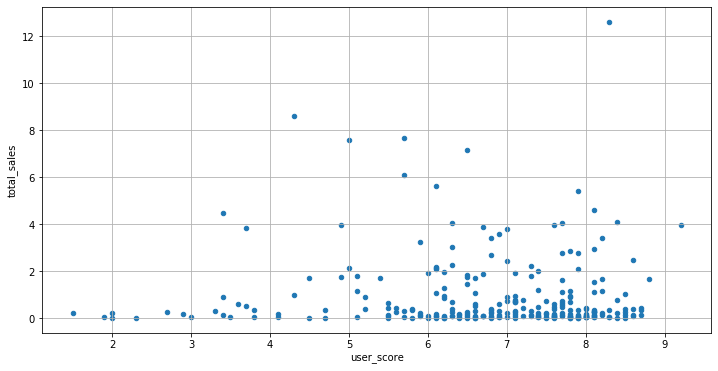

In [33]:
ps4.plot(x='user_score', y='total_sales', kind='scatter', grid=True, figsize=(12, 6))
print('Корреляция отзывов пользователей и продаж игры: {:.2%}'\
                                                  .format(ps4['total_sales'].corr(ps4['user_score'])))

На удивление корреляция получилась близкой к нулю и даже немного отрацательной (-3.2%), что говорит об отсутствии какой-либо связи между продажами игр и пользовательским рейтингом.

Таким образом, мнения пользователей могут сильно отличаться дриг от друга и поэтому **нельзя говорить о финансовом успехе игры или о ее провале по оценкам пользователей**, а вот **критики могут оказать влияние на заработок** производителей игры, но расчитывать только лишь на критиков не стоит, так как их мнение прложительные оценки не всегда приносят деньги.

Проверим эти выводы на данных о продажах на других популярных платформах за актуальный период, подсчитав корреляцию для каждой, значения не должны сильно отличаться.

In [34]:
print('Корреляция отзывов пользователей и продаж игры на платформах:')
for i in ['PS4', 'PS3', 'X360', '3DS', 'XOne']:
    df = data.query('platform == @i')
    print('{}: {:.2%}'.format(i, df['total_sales'].corr(df['user_score'])))

Корреляция отзывов пользователей и продаж игры на платформах:
PS4: -3.20%
PS3: -0.50%
X360: 0.62%
3DS: 20.38%
XOne: -6.91%


На популярных платформах за актуальный период почти на всех платформах связи между продажами и пользовательскими оценками нет, но на 3DS (4й по популярности платформе) прослеживается слабое вляние пользовательского рейтинга на продажи игр.

In [35]:
print('Корреляция отзывов критиков и продаж игры на платформах:')
for i in ['PS4', 'PS3', 'X360', '3DS', 'XOne']:
    df = data.query('platform == @i')
    print('{}: {:.2%}'.format(i, df['total_sales'].corr(df['critic_score'])))

Корреляция отзывов критиков и продаж игры на платформах:
PS4: 40.66%
PS3: 33.15%
X360: 36.06%
3DS: 32.34%
XOne: 41.70%


Не высокая связь между отзывами критиков и продажами прослеживается на всех популярных платформах.

### Анализ игр по жанрам

Посмотрим на распределение игр по жанрам.

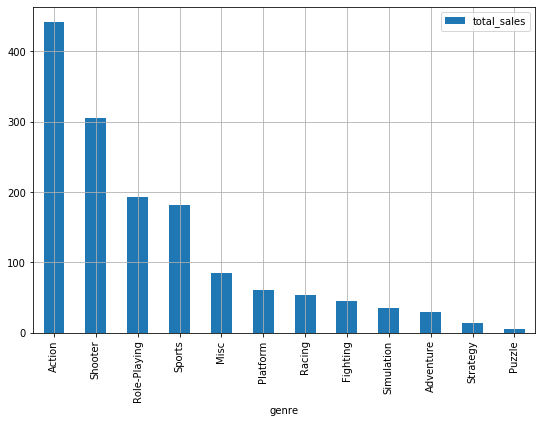

In [36]:
(data
 .pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values('total_sales', ascending=False)
 .plot(kind='bar', grid=True, figsize=(9, 6))
)

Наиболее продаваемым и, следовательно, популярным жанром является жанр 'action', а так же жанр 'shooter'. Следом более низкими продажами (меньше более чем в 2 раза в сравнении с 'action'), но все равно существенными, идут 'role-playing' и 'sports'. Меньше всего зарабатывают с жанров 'strategy' и 'puzzle'.

### Вывод

В результате анализа имеющихся данных были получены следующие выводы:

- С 1980 наблюдался рост числа выпущенных игр ежегодно и достиг своего пика в 2009 году, после чего сменился на резкое падение;
- Между появлением и исчезновением платформы с рынка проходит от 10 до 12 лет;
- Определен актуальный период, по которому будем судить, о продажах в 2017 году. Он идет с 2012 до 2016 года;
- Даже на самых популярных платформах в актуальный период намечена нисходящая тенденция в продажах игр. Тем не менее, платформы XOne и PS4 в 2017 году являются потенциально прибыльными;
- Вероятнее всего выпущенная на этих двух платформах игра продастся в количестве от 0.1 до 0.7 миллионов копий. Медиана равна примерно 0.2 миллионам;
- Мнения пользователей могут сильно отличаться дриг от друга и поэтому **нельзя говорить о финансовом успехе игры или о ее провале по оценкам пользователей**, а вот **критики могут оказать влияние** на заработок производителей игры, но расчитывать только лишь на критиков не стоит, так как их положительные оценки не всегда приносят деньги;
- Наиболее продаваемым и, следовательно, популярным жанром является жанр 'action', а так же жанр 'shooter'. Меньше всего зарабатывают с жанров 'strategy' и 'puzzle'.

## Шаг 4. Составление портрета пользователя каждого региона <a id='section4'></a>

### Топ-5 платформ по популярности

In [37]:
for i in ['na_sales', 'eu_sales', 'jp_sales']:
    print('Топ популярных платформ по столбцу', i)
    current = (data
               .pivot_table(index='platform', values=i, aggfunc='sum')
               .sort_values(i, ascending=False)
              )
    total_reg = sum(current[i])
    current[i] = (current[i] / total_reg).apply(lambda x: '{:.2%}'.format(x))
    current.columns = ['sales_ratio']
    print(current.head())

Топ популярных платформ по столбцу na_sales
         sales_ratio
platform            
X360          23.65%
PS4           18.37%
PS3           17.46%
XOne          15.73%
3DS            9.48%
Топ популярных платформ по столбцу eu_sales
         sales_ratio
platform            
PS4           27.83%
PS3           21.08%
X360          14.70%
XOne          10.17%
3DS            8.45%
Топ популярных платформ по столбцу jp_sales
         sales_ratio
platform            
3DS           45.58%
PS3           18.31%
PSV           10.96%
PS4            8.29%
WiiU           6.75%


В **Серевной Америке** по продажам лидирует Х360 (23.67%), далее с разницой больше, чем в 5% следует PS4 (18.37%). На 3 и 4 местах с небольшим отставанием стоят PS3 (17.46%) и XOne (15.73%). И на последнем месте 3DS, но интерес к ней явно слабее в этом регионе (9.48%).

В **Европе** на первом месте PS4 (27.83%), на втором с просадкой в 6.5% следует платформа предыдущего поколения PS3 (21.08%). На 3 месте с примерно такой же крупной просадкой идет X360 (14.70%) и на 4м месте XOne (10.17%). 3DS все также на 5 месте (8.45%).

В **Японии** лидирует с огромным отрывом айтсайдер предыдущих регионов 3DS (45.58%). Существенно ниже располагается PS3 (18.31%), PSV (10.96%) и PS4 (8.29%). Японская WiiU находится на 5 месте рейтинга (6.75%).

Таким образом можно сказать, что в Северной Америке и Европе оптимальным выбором будет PS4, так как в Северной Америке она находится на 2 месте и все еще имеет достаточный интерес со стороны пользователей, чтобы оправдывать разработку игр под нее, а в Европе она и вовсе находится на 1 месте со значительным перевесом интереса в свою сторону. Рынок же Японии говорит о целесообразности производить игры только под 3DS. Хотя для той же PS4 японские польхователи все еще могут принести кассу.

### Топ-5 жанров по популярности

In [38]:
for i in ['na_sales', 'eu_sales', 'jp_sales']:
    print('Топ популярных жанров по столбцу', i)
    current = (data
               .pivot_table(index='genre', values=i, aggfunc='sum')
               .sort_values(i, ascending=False)
              )
    total_reg = sum(current[i])
    current[i] = (current[i] / total_reg).apply(lambda x: '{:.2%}'.format(x))
    current.columns = ['sales_ratio']
    print(current.head())

Топ популярных жанров по столбцу na_sales
             sales_ratio
genre                   
Action            30.08%
Shooter           24.45%
Sports            13.77%
Role-Playing      10.83%
Misc               6.45%
Топ популярных жанров по столбцу eu_sales
             sales_ratio
genre                   
Action            31.47%
Shooter           22.39%
Sports            13.62%
Role-Playing       9.58%
Racing             5.38%
Топ популярных жанров по столбцу jp_sales
             sales_ratio
genre                   
Role-Playing      34.01%
Action            27.39%
Misc               6.67%
Simulation         5.40%
Fighting           4.90%


В **Серевной Америке** по продажам лидирует Action (30.08%), далее с разницой больше, чем в 5% следует Shooter (24.45%). На 3 и 4 местах с небольшим отставанием друг от друга стоят Sports (13.77%) и Role-Playing (10.83%). И на последнем месте Misc, но интерес к ней явно слабее в этом регионе (6.45%).

В **Европе** топ-5 жанров повторяет Северную Америку по местам с почти такими же процентрыми показателями, но на 5 месте здесь Racing.

В **Японии** на 1 и 2 местах с огромным отрывом лидируют Role-Playing (34.01%) и Action (27.39%). Существенно ниже располагается Misc (6.67%), Simulation (5.4%) и Fighting (4.9%).

### Влияние рейтинга ESRB на продажи

In [39]:
#data.plot(x='rating', y='na_sales', kind='scatter')
data.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc=['mean', 'median'])

mean                        median                    
        eu_sales  jp_sales  na_sales  eu_sales  jp_sales  na_sales
rating                                                            
E       0.284668  0.071350  0.288330  0.059998  0.000000  0.070007
E10+    0.180420  0.026596  0.246582  0.109985  0.000000  0.130005
M       0.389404  0.042572  0.465088  0.130005  0.000000  0.155029
T       0.128052  0.062988  0.160156  0.040009  0.010002  0.049988

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



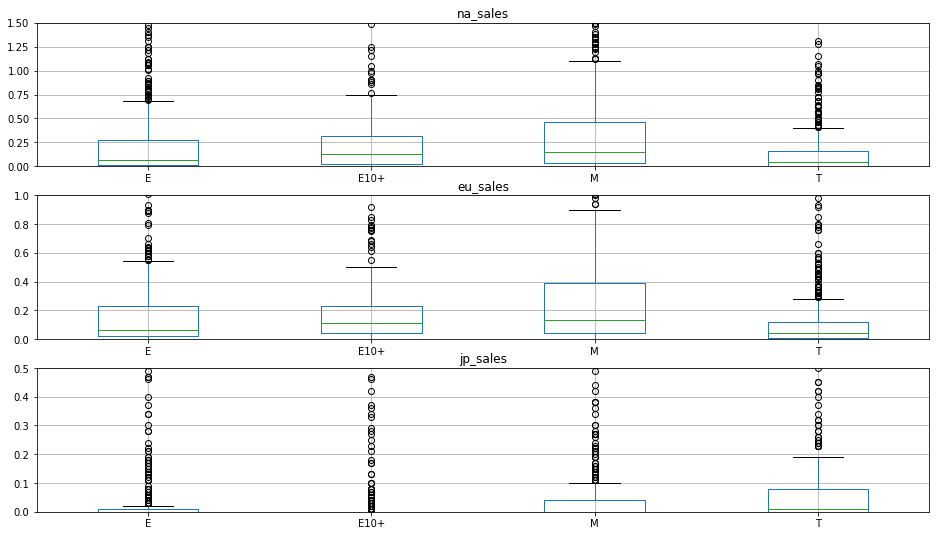

In [41]:
plt.figure(figsize=(16, 9))
j = 1
k = 1.5
for i in ['na_sales', 'eu_sales', 'jp_sales']:
    current = data[[i, 'rating']].dropna()
    e = current.query('rating == "E"')[i].reset_index(drop=True)
    e10 = current.query('rating == "E10+"')[i].reset_index(drop=True)
    m = current.query('rating == "M"')[i].reset_index(drop=True)
    t = current.query('rating == "T"')[i].reset_index(drop=True)
    d = {'E' : e,
         'E10+' : e10,
         'M' : m,
         'T' : t}

    cur_df = pd.DataFrame(d)
    plt.subplot(3, 1, j)
    j += 1
    cur_df.boxplot().set_ylim(0, k)
    k += -0.5
    plt.title(i)

В **Серевной Америке** по продажам лидируют игры с рейтингом М, далее примерно на одном уровне игры с рейтингами Е и Е10+, а на последнем месте Т.

В **Европе** картина повторяет Северную Америку, кроме того, что рейтинги Е и Е10+ теперь поменялись местами.

В **Японии** целесообразно выпускать игры жанра Т или М, ведь остальные почти ничего не собирают.

### Вывод

- В **Серевной Америке** средний пользователь скорее будет играть в игры жанра ***Action на Х360 с рейтингом "М"***, но второй по популярности платформой является потенциально прибыльная ***PS4***;

- В **Европе** средний пользователь скорее будет играть в игры жанра ***Action на PS4 с рейтингом "М"***;

- В **Японии** средний пользователь скорее будет играть в игры жанра ***Role-Playing на 3DS с рейтингом "T"***, но вторым по популярности жанром является лидирующий в других регионах ***Action***.

## Шаг 5. Проверка гипотез <a id='section5'></a>

Начнем с проверки тезиса "Средние пользовательские рейтинги платформ Xbox One и PC одинаковы". Примем пороговое значение уровня статистической значимости за 5% и выделим пользовательский рейтинг этих платформ в разные совокупности.

In [42]:
ps4 = data.query('platform == "PS4" and user_score != "NaN"')['user_score']
x1 = data.query('platform == "XOne" and user_score != "NaN"')['user_score']

In [43]:
alpha = 0.05

Проверим являются ли равными дисперсии выборок.

In [44]:
print('Дисперсия ps4:', ps4.var())
print('Дисперсия x1:', x1.var())

Дисперсия ps4: 2.13
Дисперсия x1: 1.907


Визуализируем распределения каждой выборки.

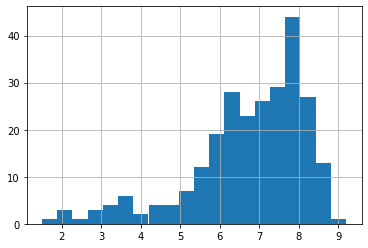

In [45]:
ps4.hist(bins=20)

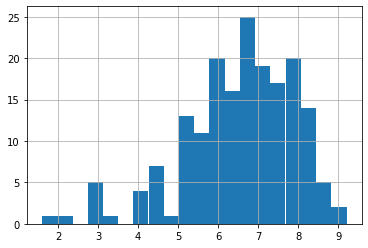

In [46]:
x1.hist(bins=20)

Обе выборки представляют собой нормальное распределение со скосом влево.

Сформируем нулевую и альтернативную гипотезы:

1) ***Нулевая гипотеза***: Средние пользовательские рейтинги платформ Xbox One и PC одинаковы.

2) ***Альтернативная гипотеза***: Средние пользовательские рейтинги платформ Xbox One и PC различаются.

Опровергнем или не опровергнем нулевую гипотезу, применив метод ttest_ind и проверим соответствие р-значения пороговому.

In [47]:
results = st.ttest_ind(ps4, x1)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.10212796746433549
Не получилось отвергнуть нулевую гипотезу


Так как **нулевую гипотезу не получилось отвергнуть**, то принимаем ее.

Проверим тезис "Средние пользовательские рейтинги жанров Action и Sports разные". Пороговое значение уровня статистической значимости оставим равным 5%. Выделим пользовательский рейтинг этих жанров в разные совокупности.

In [48]:
action = data.query('genre == "Action" and user_score != "NaN"')['user_score']
sports = data.query('genre == "Sports" and user_score != "NaN"')['user_score']

Проверим являются ли равными дисперсии выборок.

In [49]:
print('Дисперсия action:', action.var())
print('Дисперсия sports:', sports.var())

Дисперсия action: 1.886
Дисперсия sports: 3.023


Визуализируем распределения каждой выборки.

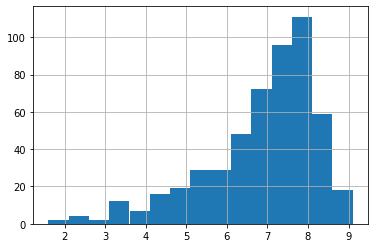

In [50]:
action.hist(bins=15)

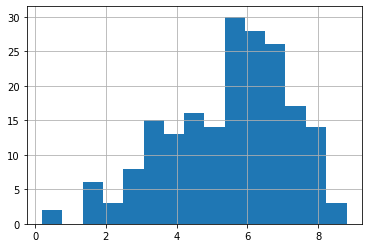

In [51]:
sports.hist(bins=15)

Обе выборки представляют собой нормальное распределение со скосом влево.

Сформируем нулевую и альтернативную гипотезы:

1) ***Нулевая гипотеза***: Средние пользовательские рейтинги жанров Action и Sports равны.

2) ***Альтернативная гипотеза***: Средние пользовательские рейтинги жанров Action и Sports разные.

Опровергнем или не опровергнем нулевую гипотезу, применив метод ttest_ind и проверим соответствие р-значения пороговому.

In [52]:
results = st.ttest_ind(action, sports)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 3.915542330797935e-26
Отвергаем нулевую гипотезу


Так как нулевая гипотеза была отвергнута, то принимаем **альтернативную гипотезу**.

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 1:
    
Всё верно, мы принимаем альтернативную гипотезу.
    
Возможно эта ссылка будет Тебе интересна: https://www.analyticsvidhya.com/blog/2019/09/everything-know-about-p-value-from-scratch-data-science/
</div>

### Вывод

Проверив гипотезы, гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковы, опровергнуть не получилось, поэтому она была принята.

Мы опровергли гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports равны, слеовательно была принята альтернативная гипотеза "Средние пользовательские рейтинги жанров Action и Sports разные".

## Шаг 6. Общий вывод <a id='section6'></a>

В проекте "Исследование популярности компьютерных игр" были проведены следующие мероприятия: определены пропуски, изменен тип данных некоторых столбцов, выполнен анализ данных и были проверены 2 гипотезы. Было установлено, что платформы **PS4 и XOne** в 2017 году являются **потенциально прибыльными**. Так же судя из анализа, мнения пользователей никак не влияют на финансовый успех игр, а вот **с мнением критиков необходимо считаться**, но расчитывать только лишь на их положительные оценки не стоит. **Наиболее популярным жанром является жанр 'action'**, а так же жанр 'shooter', а **меньше всего зарабатывают с жанров 'strategy'** и 'puzzle'.

Был составлен портрет пользователя каждого региона:
- В **Серевной Америке** средний пользователь скорее будет играть в игры жанра ***Action на Х360 с рейтингом "М"***, но второй по популярности платформой является потенциально прибыльная ***PS4***;

- В **Европе** средний пользователь скорее будет играть в игры жанра ***Action на PS4 с рейтингом "М"***;

- В **Японии** средний пользователь скорее будет играть в игры жанра ***Role-Playing на 3DS с рейтингом "T"***, но вторым по популярности жанром является лидирующий в других регионах ***Action***.

После проверки гипотез были сделаны выводы, что средние пользовательские рейтинги платформ Xbox One и PC одинаковы, а средние пользовательские рейтинги жанров Action и Sports разные.